# Reducción de dimesiones

Una vez se han reducido a la mitad las dimensiones del dataframe con PCA, se van a reducir más con UMAP

In [3]:
import numpy as np
import pandas as pd

In [4]:
import pylab as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error 
import umap.umap_ as umap

In [6]:
train = pd.read_csv('./data/train_pca.csv')
train.set_index('ID_code').head()
train.head()

,ID_code,target,0,1,2,3,4,5,6,7,...,190,191,192,193,194,195,196,197,198,199
0,train_0,0,-5.606469,-23.554409,-1.899704,5.221474,2.466672,-8.622253,2.713465,-15.071818,...,0.472871,-0.223471,0.087693,0.316206,0.036188,-0.009724,-0.133439,-0.112394,-0.210809,-0.008022
1,train_1,0,34.878028,11.469291,-3.759774,-19.274506,-8.543841,6.984967,-15.539528,-2.989574,...,0.225520,0.195946,0.182048,-0.232250,0.273408,-0.009637,0.141256,-0.272166,-0.112777,0.003286
2,train_2,0,-4.790239,-0.334213,11.359318,8.533317,1.328571,-3.218286,22.019436,-1.662104,...,0.471320,-0.438071,-0.188489,-0.217870,0.103748,0.165172,-0.180427,-0.032231,0.100097,0.003955
3,train_3,0,11.875370,14.050808,24.017588,-4.419429,0.372725,5.805502,20.132591,12.235285,...,-0.292114,0.062670,0.422309,-0.334294,-0.226519,-0.152877,-0.219387,0.108135,0.048418,0.003421
4,train_4,0,52.713134,24.315340,4.334400,23.857627,-17.868964,16.346566,-15.373475,11.752637,...,-0.071497,-0.123040,-0.107644,-0.068425,-0.243074,-0.164265,0.126321,-0.136637,0.008738,0.011002


In [14]:
train_umap = umap.UMAP(n_components=2).fit_transform(train.drop(columns=['ID_code','target']))

In [15]:
train_umap = pd.DataFrame(train_umap)

train_umap.insert(0, 'target', train.target)
train_umap.insert(0, 'ID_code', train.ID_code)

train_umap.shape

(200000, 4)

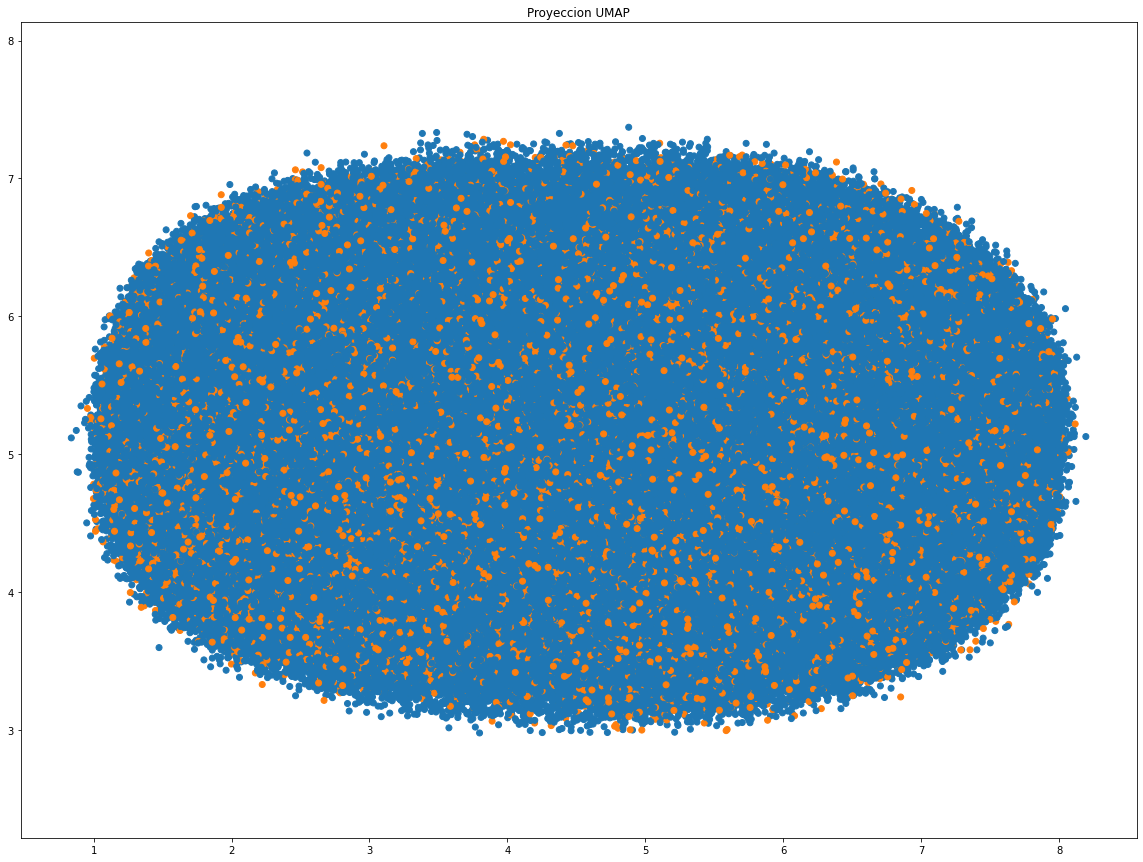

In [18]:
plt.figure(figsize=(20, 15))

plt.scatter(x=train_umap[0], y = train_umap[1], c=[sns.color_palette()[x] for x in train_umap.target])
    
plt.gca().set_aspect('equal', 'datalim')
plt.title('Proyeccion UMAP');

Se ha clusterizado con umap el dataframe para reducirlo a 2 dimensiones y poder visualizarlo, pero se concluye que la clusterización no depende del taget, por lo que se va a dividir el dataframe de entrenamiento en dos partes para obligar a umap a clusterizar en función del target y comprobar si la clusterización permite o no predecir el target

In [5]:
X = train.drop(columns=['ID_code','target'])

y = train.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

In [6]:
train_umap = umap.UMAP(n_components=2).fit_transform(X=X_train,y=y_train)

In [7]:
train_umap = pd.DataFrame(train_umap)
train_umap.shape

(160000, 2)

In [8]:
train_umap_copy = train_umap.copy()

In [9]:
train_umap['target']=pd.DataFrame(y_train.reset_index(drop=True))['target']
train_umap.head()

,0,1,target
0,-0.914675,-1.621419,0
1,0.812411,0.735484,0
2,0.137668,1.236083,0
3,-0.951044,4.633214,1
4,1.125556,-0.333511,0


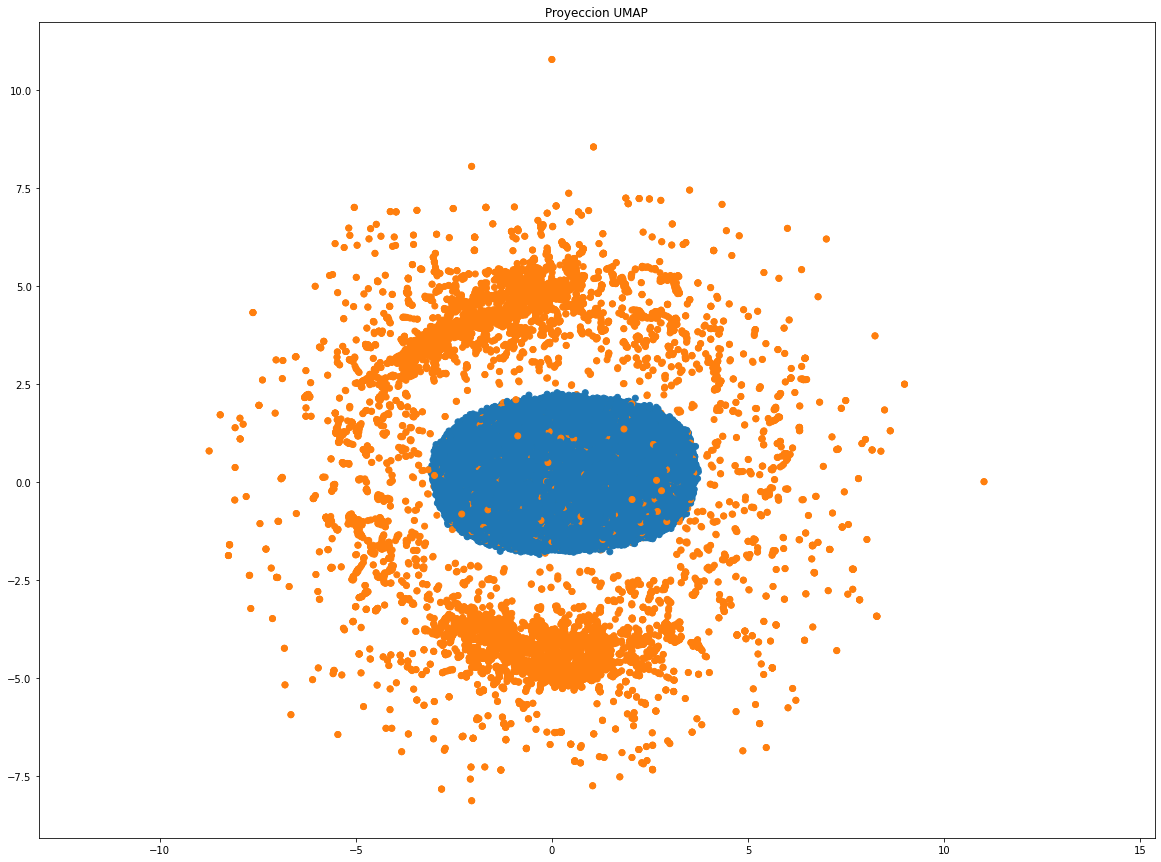

In [10]:
plt.figure(figsize=(20, 15))

plt.scatter(x=train_umap[0], y = train_umap[1], c=[sns.color_palette()[x] for x in train_umap.target])
    
plt.gca().set_aspect('equal', 'datalim')
plt.title('Proyeccion UMAP');

In [11]:
test_umap = umap.UMAP(n_components=2).fit(X=X_train,y=y_train).transform(X=X_test)
test_umap = pd.DataFrame(test_umap)
test_umap['target']=pd.DataFrame(y_test.reset_index(drop=True))['target']

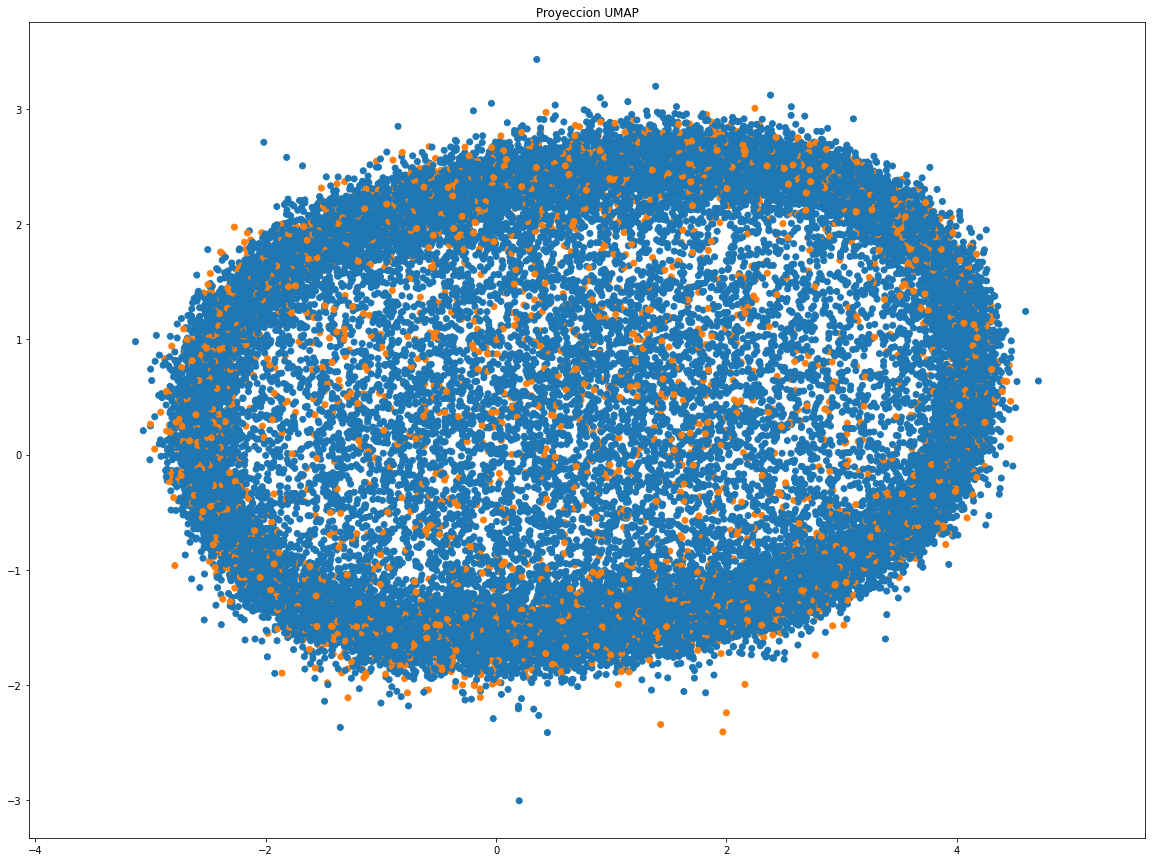

In [12]:
plt.figure(figsize=(20, 15))

plt.scatter(x=test_umap[0], y = test_umap[1], c=[sns.color_palette()[x] for x in test_umap.target])
    
plt.gca().set_aspect('equal', 'datalim')
plt.title('Proyeccion UMAP');

Reducir a 2 dimensiones con umap no arroja buemas predicciones, se van a reducir las 100 dimensiones totales a 30 y se van a aplicar diferentes modelos para predecir los precios

In [7]:
train_umap = umap.UMAP(n_components=30).fit_transform(train.drop(columns=['ID_code','target']))

In [8]:
train_umap = pd.DataFrame(train_umap)
train_umap.insert(0, 'target', train.target)
train_umap.insert(0, 'ID_code', train.ID_code)
train_umap.to_csv('./data/train_umap.csv', index=False)